In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

## Test Case 1: Simple Feedback Loop

- the feedback loop is called out explicitly
- drawing code / system generation copied from `sabbatical_github_work/py_block_diagram_drawing_tests/drawing_test_1.ipynb`

In [8]:
U = pybd.step_input("$U(s)$")

In [9]:
sum1 = pybd.summing_junction(U,radius=0.35)

In [10]:
U.place_absolute(0,0)

In [11]:
sum1.place_relative(U,"right")

In [12]:
part1 = TF([0.1,30],1)
part1

TransferFunction(array([ 0.1, 30. ]), array([1]))

In [13]:
p = 900
part2 = TF(p,[1,p])

In [14]:
Ds = part1*part2
Ds

TransferFunction(array([   90., 27000.]), array([  1, 900]))

In [15]:
D = pybd.digcomp_block(Ds, 0.002, sum1)

In [16]:
D.place_relative(sum1, "right",3.5)

In [17]:
D.input

In [18]:
sat = pybd.saturation_block("sat",D)

In [19]:
sat.place_relative(D, "right",5)

In [20]:
encoder = pybd.encoder(11)

In [21]:
HB = pybd.h_bridge(6,4,9)

In [22]:
G = pybd.plant(encoder,HB,"$G(s)$",sat)

In [23]:
G.place_relative(sat,"right",5)

In [24]:
Y = pybd.output_block("$Y(s)$",G)
Y.place_relative(G, "right",6)

In [25]:
sum1.input2 = G

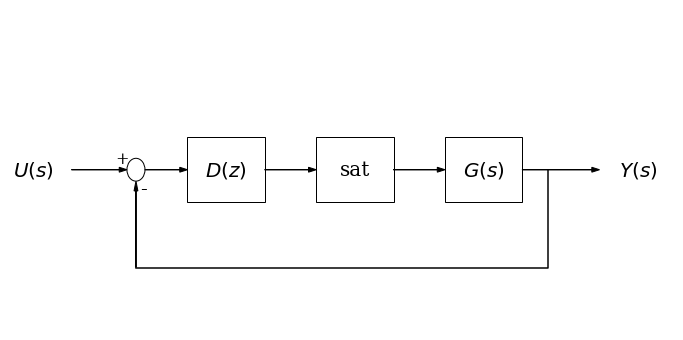

In [26]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
mysys = pybd.block_diagram([U,sum1,D,sat,G,Y],ax)
mysys.draw()
plt.xlim([-1,25])
plt.ylim([-5,5])
mysys.axis_off()

## Codegen Test on Parital System



In [27]:
test_sys = pybd.block_diagram([U,sum1,D,sat,G])

In [28]:
test_sys.get_arduino_init_code()

['step_input u = step_input(0.1, 100);',
 'summing_junction sum1 = summing_junction();',
 'float b_vect[2] = {61.57894737, -33.15789474};',
 'float a_vect[2] = {1, -0.05263157895};',
 'digcomp_block Dz = digcomp_block(b_vect, a_vect, 2, 2);',
 'saturation_block sat_block = saturation_block();',
 'h_bridge_actuator HB = h_bridge_actuator(6, 4, 9);',
 'encoder enc = encoder(11);',
 '',
 'void enc_isr_wrapper() {',
 '    enc.encoderISR();',
 '}',
 '',
 'plant G = plant(&HB, &enc);']

## Note to self:

Right now, a plant block in the Arduino library does not have an input pointer
- the input is passed in explicitly
- this seems fairly inconsistent

In [29]:
template_fn = "arduino_template1.ino"

In [30]:
test_sys.generate_arduino_code("autogen2_digcomp", template_fn)

In [31]:
test_sys.arduino_file.list

['#include <kraussserial.h>',
 '#include <rtblockdiagram.h>',
 '// both the libraries above need to be installed on student computers',
 '// - what is the most efficient way to accomplish that?',
 '//     - install from zip using the Arduino IDE?',
 '',
 '#define encoderPinA 2',
 '#define squarewave_pin 12',
 'byte inByte;',
 '',
 '// this is the code I am seeking to autogenerate:',
 '/* step_input u = step_input(0.5, 150); */',
 '/* h_bridge_actuator HB = h_bridge_actuator(6, 4, 9);//in1, in2, pwm_pin */',
 '/* encoder enc = encoder(11); */',
 '',
 '/* void enc_isr_wrapper() { */',
 '/*   enc.encoderISR(); */',
 '/* } */',
 '',
 '/* plant G = plant(&HB, &enc); */',
 '/* summing_junction sum1 = summing_junction(&u, &G); */',
 '/* PD_control_block PD = PD_control_block(3, 0.1, &sum1); */',
 '/* saturation_block sat_block = saturation_block(&PD); */',
 '',
 '//bdsysinitcode',
 'step_input u = step_input(0.1, 100);',
 'summing_junction sum1 = summing_junction();',
 'float b_vect[2] = {61.

In [32]:
test_sys.arduino_file.list.find("bdsysinitcode")

24

In [33]:
import os

In [34]:
os.getcwd()

'/home/ryanwkrauss/sabbatical_github_work/arduino_oop_block_diagram/codegen'

In [35]:
2**15-31949

819

In [36]:
100/0.0026

38461.53846153846